In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
data = pd.read_csv('summary_results_r1.csv', index_col=0)


In [76]:
data

,scennumb,nsites_train,intra,select,regression,idtrain,idtest,hm,y_ref,y_pred,TP,TN,weights
14154,1,1,1,1,0,1,1,1,0,0,0,1,0.703488
14155,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
14156,1,1,1,1,0,1,1,1,1,1,1,0,0.703488
14157,1,1,1,1,0,1,1,1,1,1,1,0,0.703488
14158,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
14159,1,1,1,1,0,1,1,1,0,0,0,1,0.703488
14160,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
14161,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
14162,1,1,1,1,0,1,1,0,0,1,0,0,0.703488
14163,1,1,1,1,0,1,1,1,1,1,1,0,0.703488


In [135]:
def get_stats(stats, N=4, weighted=True):
    
    sensitivity = []
    specificity = []
    acc = []
    w = []
    for ss in range(N):
        stats_per_site = stats[stats['idtest']==ss+1]
        
        y_ref= stats_per_site.values[:,-5].astype(float)
        y_pred= stats_per_site.values[:,-4].astype(float)
        tp = stats_per_site.values[:,-3].astype(float)
        tn = stats_per_site.values[:,-2].astype(float)
        w.append(stats_per_site.values[:,-1].astype(float).mean())
        
        sensitivity.append(np.sum(tp) / np.sum(y_ref == 1))
        specificity.append(np.sum(tn) / np.sum(y_ref == 0))
        acc.append(np.mean(y_ref == y_pred))
        
    w = np.array(w)
    acc = np.array(acc)
    sensitivity = np.array(sensitivity)
    specificity = np.array(specificity)
    if weighted:
        return [np.sum(w*acc)/N, np.sum(w*sensitivity)/N, np.sum(w*specificity)/N]
    else:
        return [np.mean(acc), np.mean(sensitivity), np.mean(specificity)]

In [137]:
scores = []
# ['idtest', 'idtrain', 'nsites_train', 'intra', 'regression', 'select']
stats = data[(data['nsites_train']==1) & (data['intra']==1) & (data['regression']==1) & (data['select']==0)]
scores.append(get_stats(stats))
stats = data[(data['nsites_train']==2) & (data['intra']==1) & (data['regression']==1) & (data['select']==0)]
scores.append(get_stats(stats))
stats = data[(data['nsites_train']==3) & (data['intra']==1) & (data['regression']==1) & (data['select']==0)]
scores.append(get_stats(stats))


print np.array(scores)

[[ 0.77018611  0.75390562  0.78646661]
 [ 0.83338705  0.78403318  0.88274093]
 [ 0.84935968  0.79519471  0.90352464]]


In [83]:
data[(data['select']==1) & (data['nsites_train']==3) & (data['idtrain']==123)]

,scennumb,nsites_train,intra,select,regression,idtrain,idtest,hm,y_ref,y_pred,TP,TN,weights
12462,9,3,1,1,0,123,1,0,0,1,0,0,0.703488
12463,9,3,1,1,0,123,1,0,0,1,0,0,0.703488
12464,9,3,1,1,0,123,1,1,0,0,0,1,0.703488
12465,9,3,1,1,0,123,1,1,0,0,0,1,0.703488
12466,9,3,1,1,0,123,1,0,0,1,0,0,0.703488
12467,9,3,1,1,0,123,1,1,1,1,1,0,0.703488
12468,9,3,1,1,0,123,1,1,0,0,0,1,0.703488
12469,9,3,1,1,0,123,1,1,0,0,0,1,0.703488
12470,9,3,1,1,0,123,1,1,1,1,1,0,0.703488
12471,9,3,1,1,0,123,1,1,1,1,1,0,0.703488


sites size [ 86.  70.  52.  34.]
Weight ratio [ 0.70348837  0.86428571  1.16346154  1.77941176]


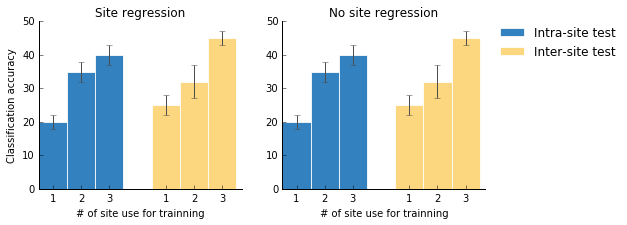

In [121]:

#import seaborn as sns
#sns.set_context("poster")#talk
plt.figure(figsize=(8, 3))
new_style = {'grid': False}
plt.rc('axes', **new_style)
n_groups = 2

means_intra = (20, 35, 40)
std_intra = (2, 3, 3)

means_inter = (25, 32, 45)
std_inter = (3, 5, 2)

#fig, ax = plt.subplots()
ax = plt.subplot(1,2,1)
bar_width = 0.25
opacity = 0.8
error_config = {'ecolor': '0.3'}

index = np.arange(0,0.75,bar_width)
rects1 = plt.bar(index, means_intra, bar_width,
                 alpha=opacity,
                 color='#0062af',
                 edgecolor='#ffffff',
                 yerr=std_intra,
                 error_kw=error_config,
                 label='Intra-site test')

index = np.arange(0.75,1.50,bar_width)
rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                 alpha=opacity,
                 color='#fdcc61',
                 edgecolor='#ffffff',
                 hatch="",
                 yerr=std_inter,
                 error_kw=error_config,
                 label='Inter-site test')


plt.xlabel('# of site use for trainning')
plt.ylabel('Classification accuracy')
plt.title('Site regression')
#plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

#plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax = plt.subplot(1,2,2)

means_intra = (20, 35, 40)
std_intra = (2, 3, 3)

means_inter = (25, 32, 45)
std_inter = (3, 5, 2)

#fig, ax = plt.subplots()
ax = plt.subplot(1,2,2)

index = np.arange(0,0.75,bar_width)
rects1 = plt.bar(index, means_intra, bar_width,
                 alpha=opacity,
                 color='#0062af',
                 edgecolor='#ffffff',
                 yerr=std_intra,
                 error_kw=error_config,
                 label='Intra-site test')

index = np.arange(0.75,1.50,bar_width)
rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                 alpha=opacity,
                 color='#fdcc61',
                 edgecolor='#ffffff',
                 hatch="",
                 yerr=std_inter,
                 error_kw=error_config,
                 label='Inter-site test')


plt.xlabel('# of site use for trainning')
#plt.ylabel('Classification accuracy')
plt.title('No site regression')
#plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#plt.tight_layout()
#plt.show()

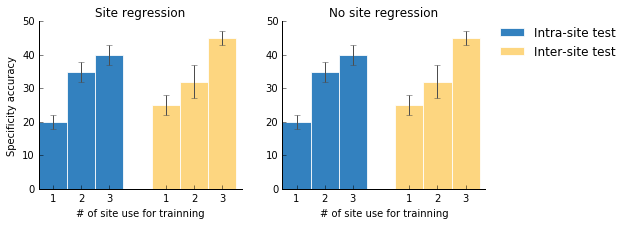

In [123]:

#import seaborn as sns
#sns.set_context("poster")#talk
plt.figure(figsize=(8, 3))
new_style = {'grid': False}
plt.rc('axes', **new_style)
n_groups = 2

means_intra = (20, 35, 40)
std_intra = (2, 3, 3)

means_inter = (25, 32, 45)
std_inter = (3, 5, 2)

#fig, ax = plt.subplots()
ax = plt.subplot(1,2,1)
bar_width = 0.25
opacity = 0.8
error_config = {'ecolor': '0.3'}

index = np.arange(0,0.75,bar_width)
rects1 = plt.bar(index, means_intra, bar_width,
                 alpha=opacity,
                 color='#0062af',
                 edgecolor='#ffffff',
                 yerr=std_intra,
                 error_kw=error_config,
                 label='Intra-site test')

index = np.arange(0.75,1.50,bar_width)
rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                 alpha=opacity,
                 color='#fdcc61',
                 edgecolor='#ffffff',
                 hatch="",
                 yerr=std_inter,
                 error_kw=error_config,
                 label='Inter-site test')


plt.xlabel('# of site use for trainning')
plt.ylabel('Specificity accuracy')
plt.title('Site regression')
#plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

#plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax = plt.subplot(1,2,2)

means_intra = (20, 35, 40)
std_intra = (2, 3, 3)

means_inter = (25, 32, 45)
std_inter = (3, 5, 2)

#fig, ax = plt.subplots()
ax = plt.subplot(1,2,2)

index = np.arange(0,0.75,bar_width)
rects1 = plt.bar(index, means_intra, bar_width,
                 alpha=opacity,
                 color='#0062af',
                 edgecolor='#ffffff',
                 yerr=std_intra,
                 error_kw=error_config,
                 label='Intra-site test')

index = np.arange(0.75,1.50,bar_width)
rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                 alpha=opacity,
                 color='#fdcc61',
                 edgecolor='#ffffff',
                 hatch="",
                 yerr=std_inter,
                 error_kw=error_config,
                 label='Inter-site test')


plt.xlabel('# of site use for trainning')
#plt.ylabel('Classification accuracy')
plt.title('No site regression')
#plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#plt.tight_layout()
#plt.show()

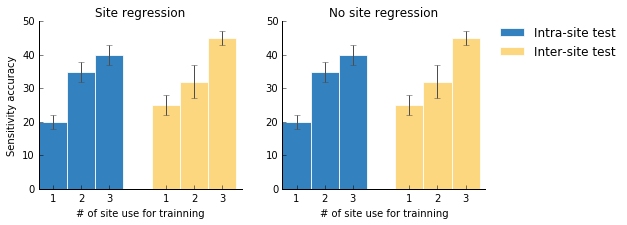

In [124]:

#import seaborn as sns
#sns.set_context("poster")#talk
plt.figure(figsize=(8, 3))
new_style = {'grid': False}
plt.rc('axes', **new_style)
n_groups = 2

means_intra = (20, 35, 40)
std_intra = (2, 3, 3)

means_inter = (25, 32, 45)
std_inter = (3, 5, 2)

#fig, ax = plt.subplots()
ax = plt.subplot(1,2,1)
bar_width = 0.25
opacity = 0.8
error_config = {'ecolor': '0.3'}

index = np.arange(0,0.75,bar_width)
rects1 = plt.bar(index, means_intra, bar_width,
                 alpha=opacity,
                 color='#0062af',
                 edgecolor='#ffffff',
                 yerr=std_intra,
                 error_kw=error_config,
                 label='Intra-site test')

index = np.arange(0.75,1.50,bar_width)
rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                 alpha=opacity,
                 color='#fdcc61',
                 edgecolor='#ffffff',
                 hatch="",
                 yerr=std_inter,
                 error_kw=error_config,
                 label='Inter-site test')


plt.xlabel('# of site use for trainning')
plt.ylabel('Sensitivity accuracy')
plt.title('Site regression')
#plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

#plt.legend()
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax = plt.subplot(1,2,2)

means_intra = (20, 35, 40)
std_intra = (2, 3, 3)

means_inter = (25, 32, 45)
std_inter = (3, 5, 2)

#fig, ax = plt.subplots()
ax = plt.subplot(1,2,2)

index = np.arange(0,0.75,bar_width)
rects1 = plt.bar(index, means_intra, bar_width,
                 alpha=opacity,
                 color='#0062af',
                 edgecolor='#ffffff',
                 yerr=std_intra,
                 error_kw=error_config,
                 label='Intra-site test')

index = np.arange(0.75,1.50,bar_width)
rects2 = plt.bar(index + bar_width, means_inter, bar_width,
                 alpha=opacity,
                 color='#fdcc61',
                 edgecolor='#ffffff',
                 hatch="",
                 yerr=std_inter,
                 error_kw=error_config,
                 label='Inter-site test')


plt.xlabel('# of site use for trainning')
#plt.ylabel('Classification accuracy')
plt.title('No site regression')
#plt.xticks(index + bar_width + bar_width/2., ('Intra-site test', 'Inter-site test'))
plt.xticks(np.hstack([np.arange(0.25/2.,0.75,bar_width),np.arange(1.+.25/2.,1.75,bar_width)]), ('1', '2', '3','1', '2', '3'))

#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., frameon=False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#plt.tight_layout()
#plt.show()